Try visualising one of the filters by feeding a small random image and setting mean activation of a filter as a maximum. Repeat this while dilating the image to produce better generation. Idea taken from https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0


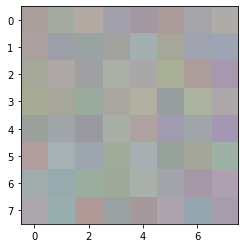

-0.010323211550712585
current m: 8


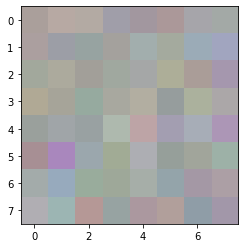

-0.014056969434022903
current m: 10


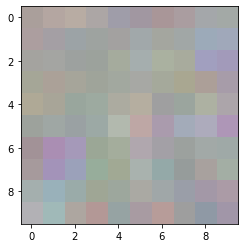

-0.01009470783174038
current m: 12


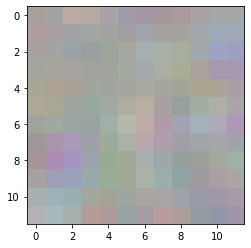

-0.00816824845969677
current m: 14


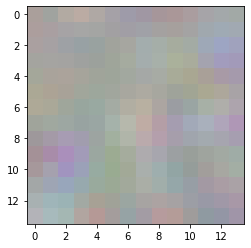

-0.007939472794532776
current m: 17


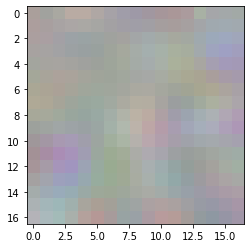

-0.00649456400424242
current m: 20


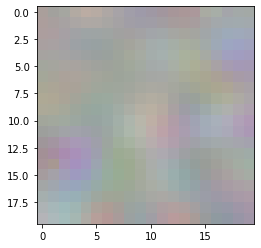

-0.005477366968989372
current m: 24


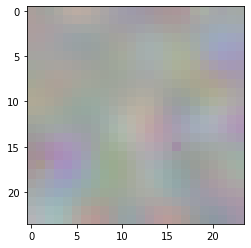

-0.004154809284955263


In [259]:
from keras import backend as K

np.random.seed(123)

m = 8
test_img = np.uint8(np.random.uniform(150, 180, (3, m, m)))/255
plt.imshow(test_img.reshape(m,m,3))
plt.show()

l = 0
k = 5

get_lth_layer_output = K.function([model.layers[0].input],
                      [model.layers[l].output])



def gain_for_layer(input_image_flat):
    m_current = int(np.round(np.sqrt(input_image_flat.shape[0] / 3)))
    eval_img = [input_image_flat.reshape(3,m_current,m_current)]
    layer_output = get_lth_layer_output([eval_img])[0]
    return (-1)*layer_output[0,k,:,:].mean()

test_img_flat = test_img.flatten()
print(gain_for_layer(test_img_flat))

test_img_flat = test_img.flatten()
m_current = m
for i in range(0,7):    
    m_current = int(np.round(np.sqrt(test_img_flat.shape[0] / 3)))
    print('current m: '+str(m_current))
    res = scipy.optimize.minimize(gain_for_layer, test_img_flat, method='Nelder-Mead', tol=1e-6, options={'maxiter': 3000})
    plt.imshow(res.x.reshape(m_current,m_current,3))
    plt.show()    
    test_img_flat = scipy.ndimage.zoom(res.x.reshape(m_current,m_current,3),(1.2,1.2,1),mode='reflect')
    test_img_flat = test_img_flat.flatten()
    print(gain_for_layer(res.x))  